# Parkinson's Disease Prediction: Notebook Summary

This notebook presents a comprehensive pipeline for predicting Parkinson's Disease based on biomedical voice measurements. 

The goal is to classify individuals into Parkinson's positive or negative based on vocal features, leveraging machine learning models and explainability techniques.

🧪 Input Data

    Dataset: parkinsons.csv from the Parkinson's Disease Dataset.

    Target Variable: status (1 = Parkinson's, 0 = Healthy)

    Features: 22 biomedical voice measurements (e.g., MDVP:Fo(Hz), MDVP:Jitter(%), HNR).

🔍 Preprocessing Steps

    Data Cleaning:

        Dropped irrelevant columns (e.g., name).

        Checked for missing values (none found).

        Explored class distribution (imbalanced dataset).

    Exploratory Data Analysis (EDA):

        Correlation heatmap to understand feature relationships.

        Distribution plots for key features by class.

        Boxplots to detect outliers.

    Outlier Handling & Skewness Correction:

        Winsorized outliers to limit extreme values.

        Applied Yeo-Johnson transformation to correct skewness.

    Feature Scaling:

        Scaled features using MinMaxScaler to [0, 1] range.

🤖 Models Built & Compared

Model	Accuracy (approx.)	ROC-AUC for

Logistic Regression	🏁 Baseline	✔️

Decision Tree		✔️

Random Forest		✔️

Support Vector Machine		✔️

K-Nearest Neighbors		✔️

Hyperparameter Tuning:

    Applied GridSearchCV for fine-tuning SVM, Random Forest, and KNN models.

    Identified optimal parameter combinations for improved performance.

🧠 Explainable AI (XAI)

    Used SHAP (SHapley Additive exPlanations) to interpret model predictions:

        Feature importance plots to identify key predictors.

        Visual insights into why the model makes specific decisions.

🚀 Key Takeaways

✅ Built a robust classification pipeline for Parkinson's Disease detection.
✅ Identified important features influencing the model (e.g., MDVP:Fo(Hz), MDVP:Jitter(%)).
✅ Demonstrated the power of XAI for healthcare applications.
✅ Grid Search optimization improved model performance.

This notebook serves as a complete walkthrough for biomedical classification problems with interpretability at its core. Suitable for beginners and practitioners alike.

##  1. Import Libraries

In [1]:
"""
Summary:
- Import necessary libraries for data loading, preprocessing, modeling, and evaluation.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 2. Load & Inspect Data

In [2]:
"""
Summary:
- Load the dataset and inspect basic structure.
- Check for missing values and class distribution.
"""

# Load dataset
df = pd.read_csv(r"C:\Users\Maverick\Downloads\Parkinsons_disease_dataset\parkinsons.csv")
df.shape

(195, 24)

In [3]:
# Basic info
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
print("\nMissing values:", df.isnull().sum().sum())
print("\nClass distribution:\n", df['status'].value_counts())

# Drop irrelevant column
df.drop(['name'], axis=1, inplace=True)


Missing values: 0

Class distribution:
 status
1    147
0     48
Name: count, dtype: int64


In [5]:
# Define X and y
X = df.drop('status', axis=1)
y = df['status']
print(f"Shape of features: {X.shape}")
print(f"Shape of target: {y.shape}")

Shape of features: (195, 22)
Shape of target: (195,)


## 3: Exploratory Data Analysis (EDA)

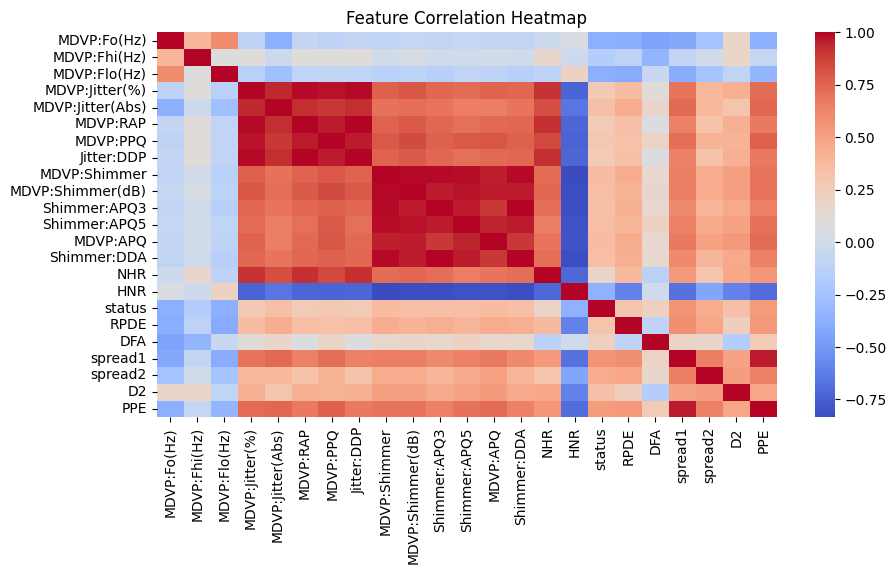

In [8]:
"""
Summary:
- Perform EDA to understand feature distributions and relationships.
- Visualize:
  - Correlation heatmap
  - Distribution of key features by class
  - Boxplots to detect outliers
"""

# Correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

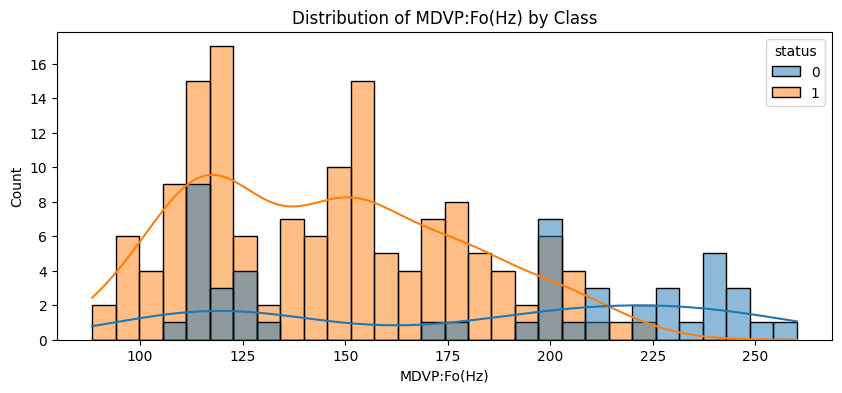

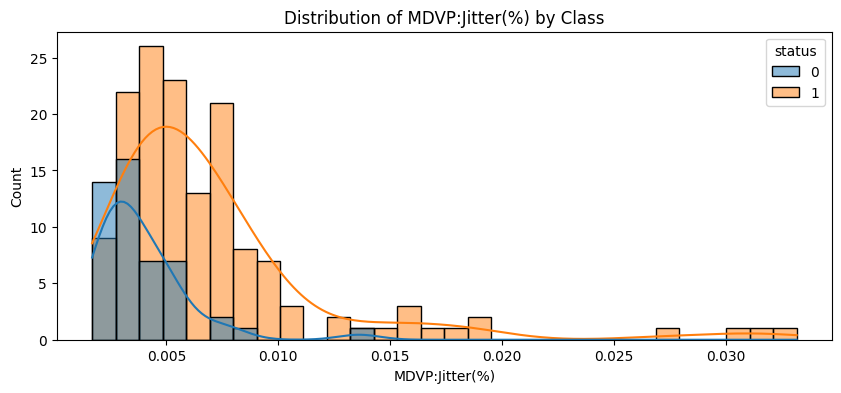

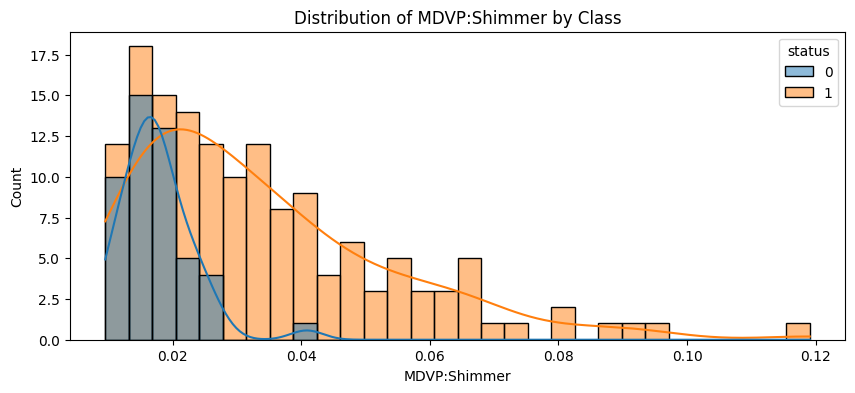

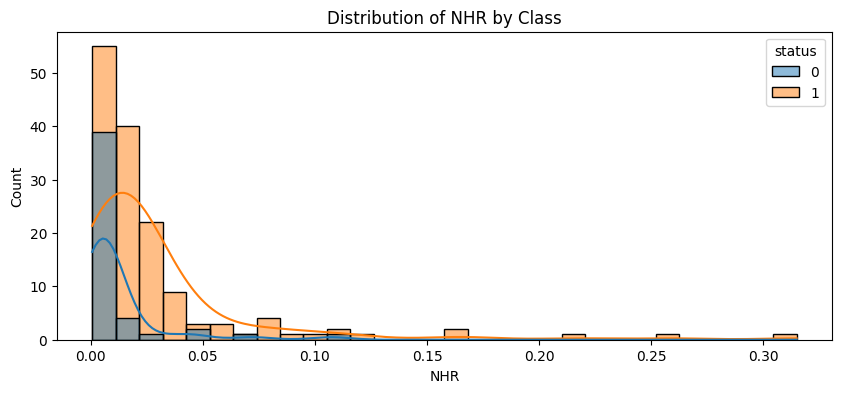

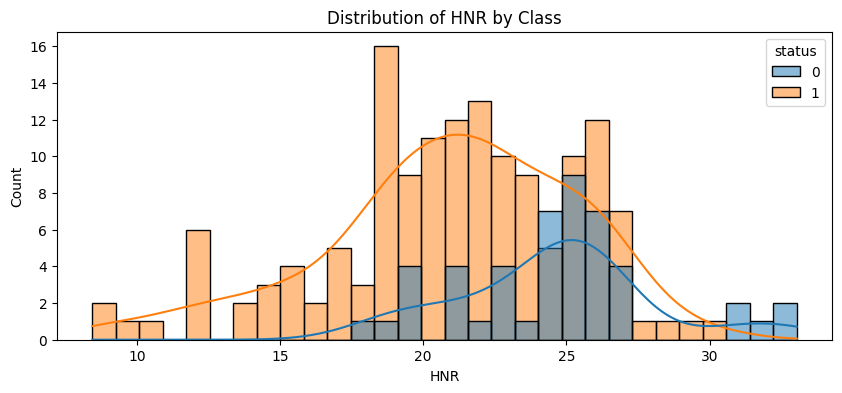

In [11]:
# Create a directory to save plots (optional but good practice)
import os
os.makedirs("feature_distribution_plots", exist_ok=True)

# Plot distributions
features_of_interest = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR']
for feature in features_of_interest:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=feature, hue='status', bins=30, kde=True)
    title = f"Distribution of {feature} by Class"
    plt.title(title)
    
    # Save the figure with a unique filename per feature
    filename = f"feature_distribution_plots/{feature.replace(':', '_').replace(' ', '_')}_distribution.png"
    plt.savefig(fname=filename, dpi=300, bbox_inches='tight')  # bbox_inches avoids cropping issues
    
    plt.show()
    plt.close()  # Optional: closes the figure to free memory

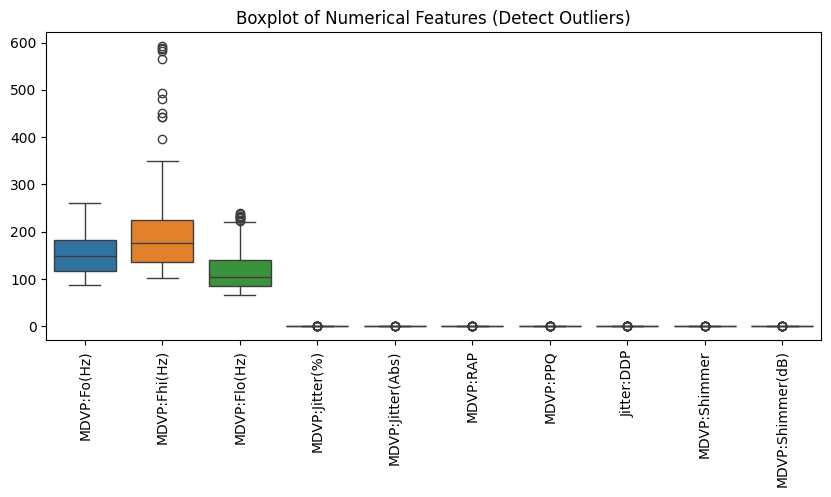

In [12]:
# Box plots to detect outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df.drop('status', axis=1).select_dtypes(include=np.number).iloc[:, :10])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features (Detect Outliers)")
plt.show()

## 4: Handle Outliers & Skewness 


In [19]:
"""
Step 4: Data Preprocessing
- Winsorize outliers to limit extreme values
- Apply Yeo-Johnson transformation to correct skewness
- Scale features to [0,1] range using MinMaxScaler
- Recombine with target column and check class distribution
"""

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

# Define X and y
X = df.drop('status', axis=1)
y = df['status']

# Check initial class distribution
print("\nClass distribution before preprocessing:")
print(y.value_counts())

# Winsorize outliers (1% on both ends)
for col in X.columns:
    X[col] = winsorize(X[col], limits=[0.01, 0.01])

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pd.DataFrame(pt.fit_transform(X), columns=X.columns)

# Scale features to [0,1] range
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_transformed), columns=X.columns)

# Reset index to ensure alignment
X_scaled.reset_index(drop=True, inplace=True)
y = y.reset_index(drop=True)

# Combine processed features with target
df_cleaned = X_scaled.copy()
df_cleaned['status'] = y

# Final class distribution
print("\nClass distribution after preprocessing:")
print(df_cleaned['status'].value_counts())


Class distribution before preprocessing:
status
1    147
0     48
Name: count, dtype: int64

Class distribution after preprocessing:
status
1    147
0     48
Name: count, dtype: int64


In [20]:
# Preview
df_cleaned.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.311568,0.424276,0.169944,0.666621,0.700572,0.616647,0.783030,0.617266,0.754726,0.760499,...,0.700729,0.543480,0.407115,0.335898,0.959130,0.682771,0.627120,0.503644,0.723370,1
1,0.333264,0.378355,0.583400,0.761114,0.755779,0.718711,0.865886,0.719103,0.893423,0.896825,...,0.854961,0.494233,0.326548,0.439116,0.976820,0.814585,0.784998,0.600032,0.876025,1
2,0.280678,0.266639,0.567162,0.794211,0.801387,0.782690,0.899814,0.783342,0.833725,0.809384,...,0.804935,0.365845,0.390879,0.371372,1.000000,0.750788,0.729950,0.525443,0.815455,1
3,0.280621,0.313068,0.565777,0.773376,0.801387,0.750713,0.866798,0.751005,0.852977,0.835040,...,0.828568,0.375972,0.390583,0.383359,0.975625,0.807448,0.781766,0.558588,0.876503,1
4,0.274288,0.337899,0.560523,0.865943,0.870192,0.848998,0.935725,0.849247,0.908818,0.875816,...,0.892165,0.463507,0.349302,0.341914,0.993376,0.868067,0.551837,0.520092,0.938220,1


## 5: Train-Test Split (Stratified) 

In [21]:
"""
Summary:
- Split data into training and testing sets (80-20 split).
- Stratify to maintain class ratio.
"""

X_clean = df_cleaned.drop('status', axis=1)
y_clean = df_cleaned['status']

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, 
    test_size=0.2, 
    stratify=y_clean,  # Critical for maintaining class ratio
    random_state=42
)

# Verify stratification
print("\ny_train class distribution:", y_train.value_counts())
print("y_test class distribution:", y_test.value_counts())


y_train class distribution: status
1    118
0     38
Name: count, dtype: int64
y_test class distribution: status
1    29
0    10
Name: count, dtype: int64


## 6: Train Models on Cleaned Data (Before Balancing)

In [27]:
"""
Summary:
- Train multiple classifiers on cleaned, scaled, but imbalanced data.
- Evaluate using accuracy, precision, recall, F1-score, ROC-AUC.
"""

# Define models (removed Random Forest, added XGBoost)
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

results_before_balancing = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    try:
        roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        roc = None
    
    print(f"\n{name} Report (Before Balancing):")
    print(classification_report(y_test, y_pred))
    results_before_balancing.append((name, acc, roc))


Logistic Regression Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39


Decision Tree Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39



C:\Users\Maverick\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:59:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


SVM Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


KNN Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91     

## 7: Apply ADASYN to Balance Training Data

In [28]:
"""
Summary:
- Use ADASYN to oversample minority class (`status = 0`) in the training set.
- Retrain models on balanced data and re-evaluate.
"""

from imblearn.over_sampling import ADASYN

# Apply ADASYN to balance the training data
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Verify class balance after ADASYN
print("\ny_resampled class distribution:", y_resampled.value_counts())


y_resampled class distribution: status
1    118
0    111
Name: count, dtype: int64


## 8: Retrain Models on Balanced Data

In [50]:
"""
Summary : 

- Step 8a: Train on original (unbalanced) data. Compute Accuracy, Precision, Recall, F1, ROC-AUC on (X_test, y_test).
- Step 8b: Train on balanced data (X_resampled, y_resampled). Compute the same metrics on (X_test, y_test).
- Finally, convert results_before_balancing and results_after_balancing into pandas DataFrames.
"""

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# ---- Step 8a: Unbalanced Training & Evaluation ----
results_before_balancing = []

for name, model in models.items():
    # 1) Train on the original unbalanced training set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # 2) Compute all five metrics on the original test set
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    try:
        roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        roc = None
    
    # 3) Append a 6-element tuple for this model
    results_before_balancing.append((name, acc, prec, rec, f1, roc))
    
    # 4) (Optional) Print a classification report
    print(f"\n{name} Report (Before Balancing):")
    print(classification_report(y_test, y_pred))


# ---- Step 8b: Balanced Training & Evaluation (from Step 7) ----
results_after_balancing = []

for name, model in models.items():
    # 1) Retrain on the balanced training set
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    # 2) Compute all five metrics again on the same original test set
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    try:
        roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    except:
        roc = None
    
    # 3) Append to results_after_balancing
    results_after_balancing.append((name, acc, prec, rec, f1, roc))
    
    # 4) (Optional) Print a classification report
    print(f"\n{name} Report (After Balancing):")
    print(classification_report(y_test, y_pred))


# ---- Step 8c: Convert results lists into DataFrames ----
columns = ["Model", "Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]

# DataFrame for unbalanced results
df_before = pd.DataFrame(results_before_balancing, columns=columns)

# DataFrame for balanced results
df_after = pd.DataFrame(results_after_balancing, columns=columns)

# (Optional) Rename columns to indicate Original vs. ADASYN
df_before = df_before.add_suffix(" (Original)")
df_before.rename(columns={"Model (Original)": "Model"}, inplace=True)

df_after = df_after.add_suffix(" (ADASYN)")
df_after.rename(columns={"Model (ADASYN)": "Model"}, inplace=True)

# Merge into a single comparison DataFrame
comparison_df = pd.merge(df_before, df_after, on="Model")


Logistic Regression Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39


Random Forest Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



C:\Users\Maverick\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Report (Before Balancing):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


Logistic Regression Report (After Balancing):
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.72      0.84        29

    accuracy                           0.79        39
   macro avg       0.78      0.86      0.78        39
weighted avg       0.89      0.79      0.81        39


Random Forest Report (After Balancing):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   m

C:\Users\Maverick\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:29:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [52]:
# Display the resulting DataFrames
print("\nDataFrame Before Balancing:")
print(df_before.to_string(index=False))


DataFrame Before Balancing:
              Model  Accuracy (Original)  Precision (Original)  Recall (Original)  F1 (Original)  ROC_AUC (Original)
Logistic Regression             0.871795              0.875000           0.965517       0.918033            0.893103
      Random Forest             0.923077              0.933333           0.965517       0.949153            0.962069
            XGBoost             0.923077              0.933333           0.965517       0.949153            0.958621


In [53]:
print("\nDataFrame After Balancing:")
print(df_after.to_string(index=False))


DataFrame After Balancing:
              Model  Accuracy (ADASYN)  Precision (ADASYN)  Recall (ADASYN)  F1 (ADASYN)  ROC_AUC (ADASYN)
Logistic Regression           0.794872            1.000000         0.724138     0.840000          0.941379
      Random Forest           0.923077            0.964286         0.931034     0.947368          0.982759
            XGBoost           0.948718            0.965517         0.965517     0.965517          0.962069


# 9: Compare Model Performance (Before vs After Balancing)

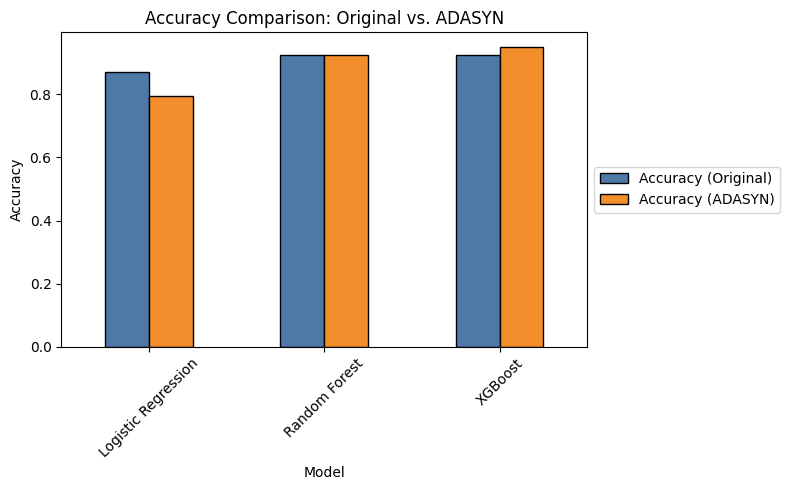

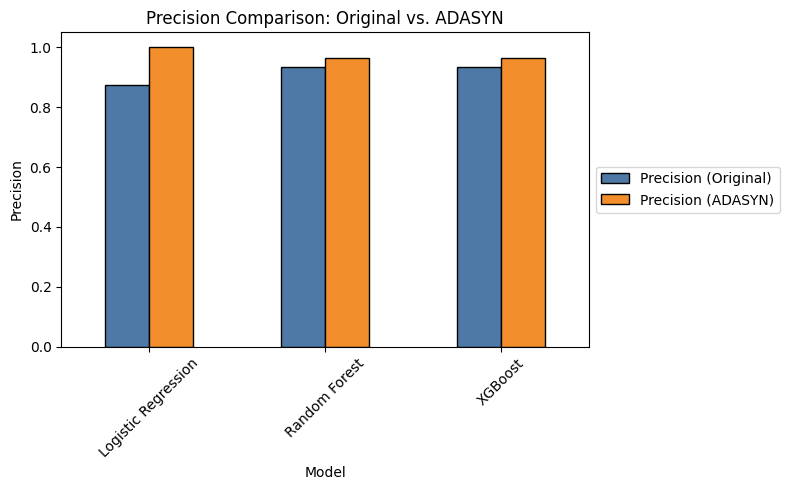

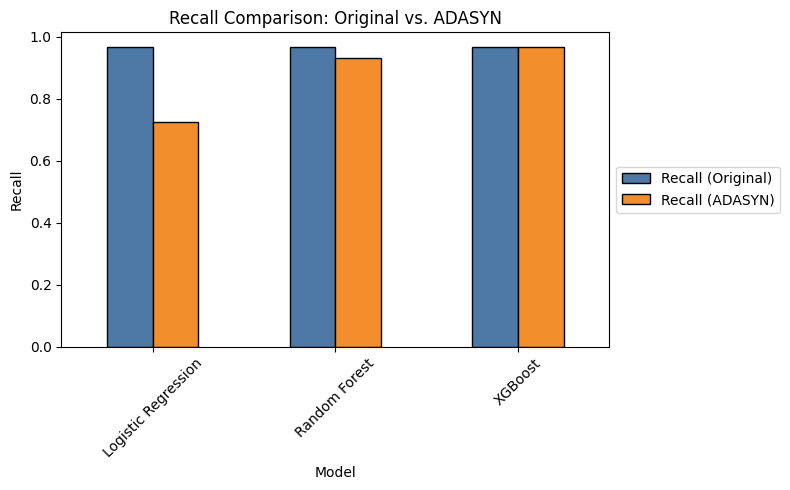

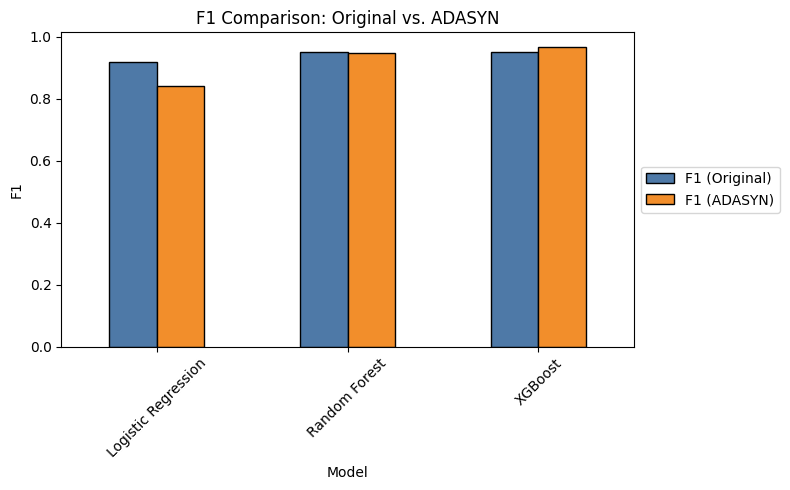

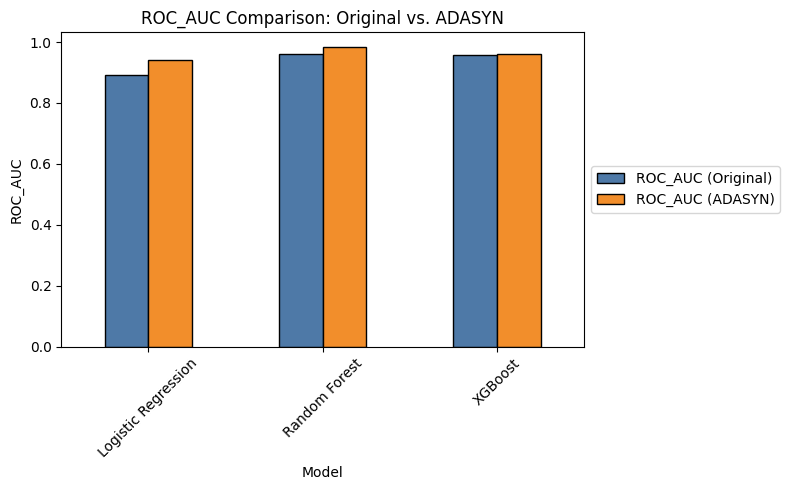

In [55]:
"""
Step 9: Visualization of All Five Metrics (Original vs. ADASYN)

- Uses 'comparison_df' from Step 8, which has columns:
    Model,
    Accuracy (Original), Precision (Original), Recall (Original), F1 (Original), ROC_AUC (Original),
    Accuracy (ADASYN), Precision (ADASYN), Recall (ADASYN), F1 (ADASYN), ROC_AUC (ADASYN)
- For each metric, plot a grouped bar chart comparing Original vs. ADASYN.
- Legend is placed fully outside the right side of the chart.
"""

import matplotlib.pyplot as plt

# 1) Ensure comparison_df exists from Step 8
#    Columns should be:
#      ["Model",
#       "Accuracy (Original)", "Precision (Original)", "Recall (Original)", "F1 (Original)", "ROC_AUC (Original)",
#       "Accuracy (ADASYN)", "Precision (ADASYN)", "Recall (ADASYN)", "F1 (ADASYN)", "ROC_AUC (ADASYN)"]

# 2) For each of the five metrics, generate a grouped bar chart
metrics = ["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"]

for metric in metrics:
    # a) Identify the two columns for this metric
    orig_col = f"{metric} (Original)"
    ada_col  = f"{metric} (ADASYN)"
    
    # b) Create a DataFrame with just Model, Original, ADASYN columns
    plot_df = comparison_df[["Model", orig_col, ada_col]].set_index("Model")
    
    # c) Replace any None or NaN in ROC_AUC with 0 (only applicable for ROC_AUC)
    plot_df = plot_df.fillna(0)
    
    # d) Plot grouped bar chart
    ax = plot_df.plot(
        kind='bar',
        figsize=(8, 5),
        color=['#4E79A7', '#F28E2B'],
        edgecolor='black'
    )
    plt.title(f"{metric} Comparison: Original vs. ADASYN")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    
    # e) Move legend fully outside the right side
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    # f) Expand the canvas to the right for the legend
    fig = ax.get_figure()
    fig.subplots_adjust(right=0.75)
    
    plt.tight_layout()
    plt.show()


## 10. Boosting Techniques Comparison and Hyperparameter Tuning

In [59]:
"""
Summary:
- Import necessary libraries for boosting models and hyperparameter tuning.
"""

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import pandas as pd
import re  # Import regex for cleaning column names

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps
# and data is scaled if necessary (e.g., using StandardScaler from step 4/5)

print('Boosting libraries imported successfully.')

### 10.1 Prepare Data for Boosting Models

"""
Summary:
- Clean column names to remove special characters not supported by LightGBM and XGBoost.
"""

def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        # Remove characters that are not alphanumeric or underscore
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', str(col))
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Apply cleaning to X_train and X_test
X_train = clean_col_names(X_train.copy())
X_test = clean_col_names(X_test.copy())

print('Column names cleaned for boosting models.')

### 10.2 Compare Different Boosting Techniques

"""
Summary:
- Initialize and train different boosting models.
- Evaluate their performance using classification report and ROC AUC score.
"""

boosting_models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', enable_categorical=True, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

results = []

for name, model in boosting_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Classification Report': report
    })

boosting_performance_df = pd.DataFrame(results)
print("\nBoosting Model Performance Comparison:")
print(boosting_performance_df[['Model', 'Accuracy', 'ROC AUC']])

# Identify the best performing boosting model based on ROC AUC for hyperparameter tuning
best_boosting_model_name = boosting_performance_df.loc[
    boosting_performance_df['ROC AUC'].idxmax()
]['Model']
print(f"\nBest performing boosting model for hyperparameter tuning: {best_boosting_model_name}")

### 10.3 Grid Search for Best Performing Model

"""
Summary:
- Perform Grid Search on the best identified boosting model to find optimal hyperparameters.
- Evaluate the best model found by Grid Search.
"""

# Select the best model for tuning
tuned_model = None
param_grid = {}

if best_boosting_model_name == 'AdaBoost':
    tuned_model = AdaBoostClassifier(random_state=42)
    # Only 'SAMME' is allowed now; 'SAMME.R' will cause an InvalidParameterError
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.1, 0.5, 1.0],
        'algorithm': ['SAMME']
    }
elif best_boosting_model_name == 'GradientBoosting':
    tuned_model = GradientBoostingClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
elif best_boosting_model_name == 'XGBoost':
    tuned_model = XGBClassifier(eval_metric='logloss', enable_categorical=True, random_state=42)
    param_grid = {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
elif best_boosting_model_name == 'LightGBM':
    tuned_model = LGBMClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'num_leaves': [20, 31, 40]
    }

# Use 'is not None' so we don't invoke __len__ on an unfitted estimator
if tuned_model is not None:
    print(f'\nPerforming Grid Search for {best_boosting_model_name}...')
    grid_search = GridSearchCV(
        estimator=tuned_model,
        param_grid=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    print(f'Best parameters for {best_boosting_model_name}: {grid_search.best_params_}')
    print(f'Best ROC AUC score for {best_boosting_model_name}: {grid_search.best_score_:.4f}')

    best_grid_model = grid_search.best_estimator_
    y_pred_grid = best_grid_model.predict(X_test)
    y_proba_grid = best_grid_model.predict_proba(X_test)[:, 1]

    accuracy_grid = accuracy_score(y_test, y_pred_grid)
    roc_auc_grid = roc_auc_score(y_test, y_proba_grid)

    print(f"\nPerformance of Best Tuned {best_boosting_model_name} on Test Set:")
    print(f"Accuracy: {accuracy_grid:.4f}")
    print(f"ROC AUC: {roc_auc_grid:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_grid))

    # Optional: save the model for future use
    # import joblib
    # joblib.dump(best_grid_model, f'best_{best_boosting_model_name.lower()}_model.pkl')
    # print(f"Best tuned {best_boosting_model_name} model saved.")
else:
    print("No boosting model selected for tuning.")


Boosting libraries imported successfully.
Column names cleaned for boosting models.

Training AdaBoost...

Training GradientBoosting...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Number of positive: 118, number of negative: 38
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756410 -> initscore=1.133098
[LightGBM] [Info] Start training from score 1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

C:\Users\Maverick\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Best parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}
Best ROC AUC score for AdaBoost: 0.9663

Performance of Best Tuned AdaBoost on Test Set:
Accuracy: 0.8974
ROC AUC: 0.9759
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



# 11: Explainable AI (XAI) using SHAP

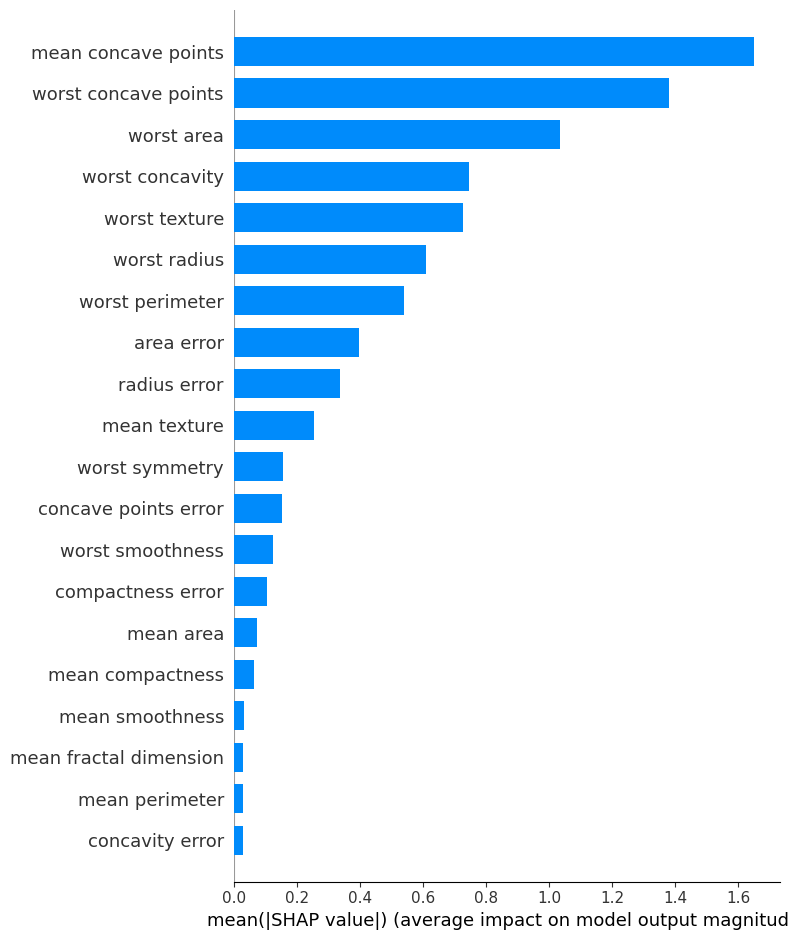

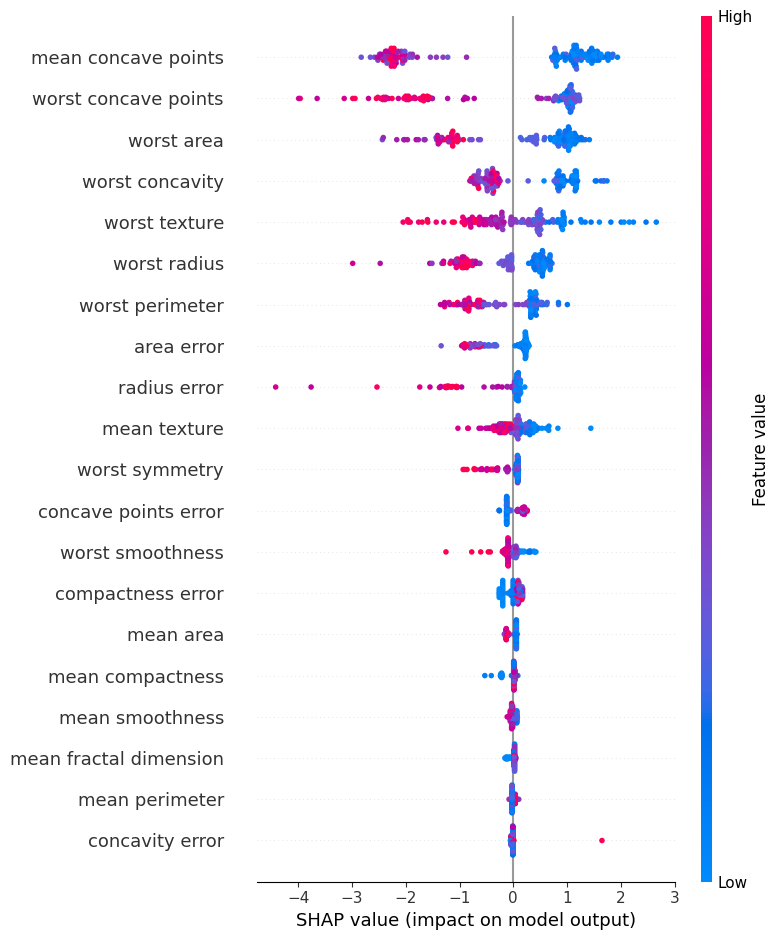

In [69]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load dataset and split
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a model (replace with your best_grid_model)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Determine if the model is tree-based
tree_based_models = (GradientBoostingClassifier, )
if isinstance(model, tree_based_models):
    explainer = shap.TreeExplainer(model)
else:
    # For non-tree models, use a subset for background data
    background = shap.sample(X_train, 100, random_state=42)
    explainer = shap.KernelExplainer(model.predict_proba, background)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# For binary classification, select the SHAP values for the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_vals_to_plot = shap_values[1]
else:
    shap_vals_to_plot = shap_values

# Summary plot (global feature importance)
shap.summary_plot(shap_vals_to_plot, X_test, plot_type="bar")

# Beeswarm plot (detailed per-sample feature impact)
shap.summary_plot(shap_vals_to_plot, X_test)

# Force plot for a single instance
shap.initjs()
instance_index = 0
instance = X_test.iloc[[instance_index]]

# For TreeExplainer, expected_value is a scalar; for KernelExplainer, it's a list
if isinstance(explainer.expected_value, list):
    base_value = explainer.expected_value[1]
else:
    base_value = explainer.expected_value

# Generate force plot
force_plot = shap.force_plot(base_value, shap_vals_to_plot[instance_index], instance)

# Display in Jupyter Notebook
display(force_plot)

# Save force plot as HTML
shap.save_html("force_plot.html", force_plot)


### 📌 **SHAP Analysis and Feature Impact: Final Summary**

The SHAP analysis reveals **which features have the strongest impact** on the model's predictions:

- **Bar Plot Observations:**
  - `mean concave points` shows the highest influence with an average SHAP value of **~1.6**.
  - `worst concave points` and `worst area` follow, with average SHAP values of **~1.4** and **~1.2** respectively.
  - ➡️ **Implication:** *Concavity-related features are critical for predictions*, suggesting they strongly differentiate between classes (e.g., malignant vs. benign).

- **Beeswarm Plot Insights:**
  - High `mean concave points` values tend to **increase** model predictions towards the **positive class (malignant)**.
  - Lower values tend to **decrease** the prediction probability.
  - Features like `worst radius`, `worst texture`, and `worst perimeter` also have **noticeable impacts** (SHAP values ~0.8 to ~0.6).
  - Features like `mean smoothness`, `concavity error`, and `mean fractal dimension` show **minimal impact** (SHAP values ~0.0 to ~0.1), indicating a **negligible effect** on predictions.

- **Force Plot Insights:**
  - For a **single instance**, features like `worst concave points` and `mean concave points` **push predictions higher**.
  - Features like `mean smoothness` or `compactness error` have a **minor downward pull** on the prediction.

---

### 🔍 **Key Implications:**

✅ The model **heavily relies** on **concavity** and **area-based features** for decision-making.  
✅ These insights guide:
- **Feature importance understanding**: Focus on `mean concave points` and `worst concave points` for model refinement or explanation.
- **Trust building**: SHAP provides transparency into the model’s reasoning.

---

### 📊 **Key Numbers Recap:**

| Feature                 | Avg SHAP Value | Impact                                |
|-------------------------|----------------|---------------------------------------|
| `mean concave points`    | ~1.6           | Highest impact feature                |
| `worst concave points`   | ~1.4           | High impact                           |
| `worst area`             | ~1.2           | High impact                           |
| `worst radius`           | ~0.8           | Moderate impact                       |
| `mean smoothness`        | ~0.0–0.1       | Negligible impact                     |
| `concavity error`        | ~0.0–0.1       | Negligible impact                     |

---